<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/Placement_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
df=pd.read_csv("/content/archive (1).zip")

In [110]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [111]:
df=df.drop("StudentID",axis=1)

In [112]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


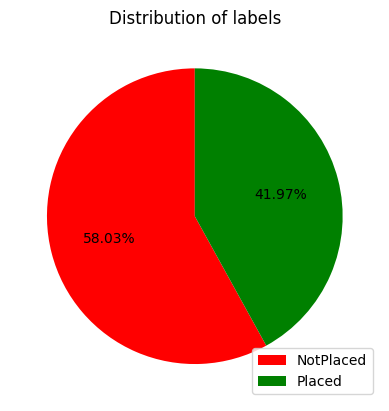

In [138]:
plt.pie(df.PlacementStatus.value_counts().values,autopct='%.2f%%',colors=['red','green'], startangle=90)
plt.legend(df.PlacementStatus.unique())
plt.title('Distribution of labels')
plt.show()

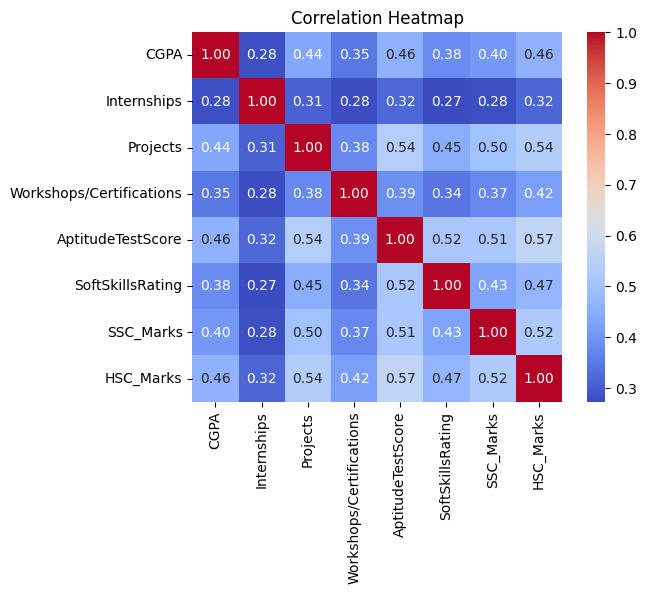

In [140]:
import seaborn as sn
temp_df = df[[col for col in df.columns if df[col].dtype!='O']]
Corr = temp_df.corr()
sn.heatmap(Corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Heatmap')
plt.show()

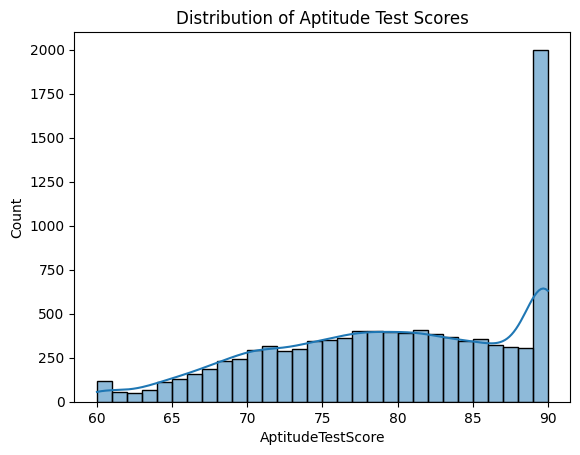

In [142]:
sn.histplot(df['AptitudeTestScore'], bins=30, kde=True)
plt.title('Distribution of Aptitude Test Scores')
plt.show()

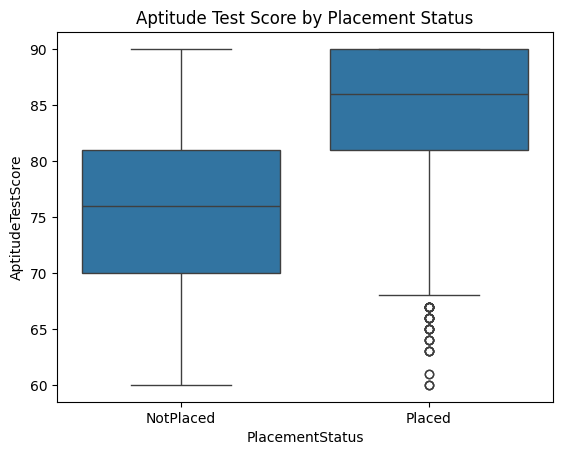

In [144]:
sn.boxplot(x='PlacementStatus', y='AptitudeTestScore', data=df)
plt.title('Aptitude Test Score by Placement Status')
plt.show()

In [113]:
X=df.drop("PlacementStatus",axis=1)
y=df['PlacementStatus'].copy()

In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [116]:
df['PlacementStatus'].value_counts()

,count
PlacementStatus,
NotPlaced,5803
Placed,4197


In [117]:
cat_features=X_train.select_dtypes(include='object').columns
num_features=X_train.select_dtypes(exclude='object').columns

In [118]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing  import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

transformer=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)],remainder='passthrough'
)

In [119]:
X_transformed_train=transformer.fit_transform(X_train)
X_transformed_test=transformer.transform(X_test)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [121]:
class_weights = {'NotPlaced': 0.45, 'Placed': 0.55}

In [122]:
rnd_clf=RandomForestClassifier(class_weight=class_weights,max_depth=5,min_samples_split=5)
dt_clf=DecisionTreeClassifier(class_weight=class_weights,max_depth=6)
log_reg=LogisticRegression()

In [123]:
rnd_clf.fit(X_transformed_train,y_train)
dt_clf.fit(X_transformed_train,y_train)
log_reg.fit(X_transformed_train,y_train)

LogisticRegression()

In [124]:
rnd_clf.score(X_transformed_test,y_test)

0.793

In [125]:
rnd_clf.score(X_transformed_train,y_train)

0.80475

In [126]:
dt_clf.score(X_transformed_test,y_test)

0.7815

In [127]:
dt_clf.score(X_transformed_train,y_train)

0.81175

In [130]:
log_reg.score(X_transformed_train,y_train)

0.8

In [131]:
log_reg.score(X_transformed_test,y_test)

0.7945